In [2]:
import numpy as np
import matplotlib.pyplot as plt

[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
[0 1 2 3 4 0 1 2 3 4]
analytical value of dispersal is  0.8


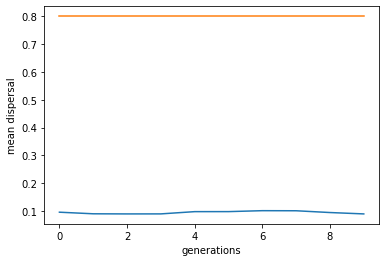

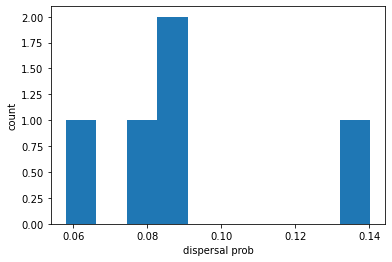

In [5]:
###############################
### parameters
###############################

max_time = 10

L = 5 #256 #number of sites
num_babies = 2 #32 # number of offspring each parent has, b
disp_survival = 0.75 # the probability of surviving dispersal, p


initial_dispersal = 0.1, #prob of dispersal v
mut_scale = 0.01 # this sets the range of mutation sizes

###############################
### set up
###############################

# start one individual on each site
locations = np.arange(0,L,1,dtype=int)

#TWO options for initial dispersal
#i) start will all the same dispersal prob
dispersal = np.full(len(locations),initial_dispersal)

#ii) start with all random values of dispersal
#dispersal = np.random.rand(len(locations))

#a place holder for data
mean_dispersal_over_time = np.zeros(max_time)

###############################
### run
###############################


for t in range(max_time):
    #print(t)
    
    #### reproduce
    locations = np.tile(locations, num_babies) #Tile makes an array by repeating arg 1 the number of times given by arg_2.
    dispersal = np.tile(dispersal, num_babies)
    
    print(locations)
    
    #### disperse
    #find those who will disperse
    dispersal_mask = np.random.rand(num_babies*L)<dispersal
    #find those who will die if they disperse
    risk_mask = np.random.rand(num_babies*L)>disp_survival
    #find those who will disperse and die
    death_mask = np.logical_and(dispersal_mask,risk_mask)
    num_dispersing = np.sum(dispersal_mask)
    #move dispersers to random sites
    locations[dispersal_mask] = np.random.randint(0,L,num_dispersing)
    #get rid of the ones who died dispersing
    locations = locations[~death_mask]
    dispersal = dispersal[~death_mask]
    
    #### compete
    new_dispersal = np.empty(L,dtype=float) #place holder for updated dispersal values
    for site in range(L):
        here_mask = locations == site #find the individuals at this site
        if(np.sum(here_mask)>0):
            #pick one of them to win the site
            new_dispersal[site] = np.random.choice(dispersal[here_mask])
        else:
            #in case there is no one there (should not happen)
            new_dispersal[site] = np.random.choice(dispersal)
    #update traits
    dispersal = new_dispersal
    locations = np.arange(0,L,1,dtype=int)
    
    #### evolve
    dispersal = np.clip(np.random.normal(dispersal,mut_scale),0.0,1.0) #clip keeps dispersal between 0 and 1
    
    #### record the evolution of the mean trait over time
    mean_dispersal_over_time[t] = np.mean(dispersal)

v_star = 1/(2-disp_survival)    
    
plt.figure()
plt.plot(mean_dispersal_over_time)
plt.plot(np.full(max_time,v_star))
plt.xlabel('generations')
plt.ylabel('mean dispersal')

plt.figure()
plt.hist(dispersal)
plt.ylabel('count')
plt.xlabel('dispersal prob')
print('analytical value of dispersal is ', str(v_star))

In [ ]:
#Lab

#Turning the code into a function that takes the relevant parameters as arguments and returns an average dispersal prob
#Best if you average over individuals and time (but not the transient!)

###############################
### parameters
###############################

max_time = 10

L = 5 #256 #number of sites
num_babies = 2 #32 # number of offspring each parent has, b
disp_survival = 0.75 # the probability of surviving dispersal, p


initial_dispersal = 0.1, #prob of dispersal v
mut_scale = 0.01 # this sets the range of mutation sizes

###############################
### set up
###############################

# start one individual on each site
locations = np.arange(0,L,1,dtype=int)

#TWO options for initial dispersal
#i) start will all the same dispersal prob
dispersal = np.full(len(locations),initial_dispersal)

#ii) start with all random values of dispersal
#dispersal = np.random.rand(len(locations))

#a place holder for data
mean_dispersal_over_time = np.zeros(max_time)
def hamilton_may(L, num_babies, max_time, initial_dispersal, disp_survival, mut_scale, locations, dispersal)

    for t in range(max_time):
        #print(t)

        #### reproduce
        locations = np.tile(locations, num_babies) #Tile makes an array by repeating arg 1 the number of times given by arg_2.
        dispersal = np.tile(dispersal, num_babies)

        #print(locations)

        #### disperse
        #find those who will disperse
        dispersal_mask = np.random.rand(num_babies*L)<dispersal
        #find those who will die if they disperse
        risk_mask = np.random.rand(num_babies*L)>disp_survival
        #find those who will disperse and die
        death_mask = np.logical_and(dispersal_mask,risk_mask)
        num_dispersing = np.sum(dispersal_mask)
        #move dispersers to random sites
        locations[dispersal_mask] = np.random.randint(0,L,num_dispersing)
        #get rid of the ones who died dispersing
        locations = locations[~death_mask]
        dispersal = dispersal[~death_mask]

        #### compete
        new_dispersal = np.empty(L,dtype=float) #place holder for updated dispersal values
        for site in range(L):
            here_mask = locations == site #find the individuals at this site
            if(np.sum(here_mask)>0):
                #pick one of them to win the site
                new_dispersal[site] = np.random.choice(dispersal[here_mask])
            else:
                #in case there is no one there (should not happen)
                new_dispersal[site] = np.random.choice(dispersal)
        #update traits
        dispersal = new_dispersal
        locations = np.arange(0,L,1,dtype=int)

        #### evolve
        dispersal = np.clip(np.random.normal(dispersal,mut_scale),0.0,1.0) #clip keeps dispersal between 0 and 1

        #### record the evolution of the mean trait over time
        mean_dispersal_over_time[t] = np.mean(dispersal)
